# [Analyse et exploiration des données](Section)

In [1]:
import os
import glob
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import plotly.graph_objects as go


from sklearn.impute import SimpleImputer

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

Nos données sont les donées d'un client Brésilien, c'est un ensemble de dataset d'un site de e-commerce Brésilien. Cest datasets contiennent les données des commandes électroniques passées sur le site Brésilent Olist. Le jeu de données contient des informations sur 100000 commandes passées entre 2016 et 2018 sur plusieurs marchés au Brésil. Les différentes feaures présents dans le dataset permettent de visualiser une commande à partir sous plusieurs dimensions: statut de la commande, prix, paiement, performances du transport, l'emplacement du client, attributs du produit et aussi les avis rédigés par les clients.

Nos données sont dans des csv dans le dossier archive du repertoire courant. Ce dossier contient neuf csv.

- olist_customers_dataset.csv contient les informations clients.
- olist_geolocation_dataset.csv contient les informations sur la géolocalisation
- olist_order_items_dataset.csv contient les informations sur les items
- olist_order_payments_dataset.csv contient les informations sur les payements 
- olist_order_reviews_dataset.csv contient les informations l'évaluation des produits
- olist_orders_dataset.csv contient les informations sur les achats
- olist_products_dataset.csv contient les informations sur les produits
- olist_sellers_dataset.csv contient les information sur les vendeurs
- product_category_name_translation.csv contient les informations sur les catégories des produits

In [76]:
os.chdir(r'/Users/boleynkenkem/Desktop/POLIST_KENKEM_Boleyn')
path = r'/Users/boleynkenkem/Desktop/POLIST_KENKEM_Boleyn/archive' # path archive
all_files = glob.glob(path + "/*.csv")


liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
li = []

for filename in all_files:
    
    #Affichage des tailles des fichiers et des données manquantes
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename.split('/')[-1],"-------------->>>", df.shape, "\n",
          df.isna().sum().sum()/df.shape[0]/df.shape[1], 'NaN', "\n",
          df.duplicated().sum(), 'duplicates')
    
    #liste de DataFrame
    li.append(df)
    
    
    for column in df.columns:
        liste_indices.append(filename.split('/')[-1])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques']
    
frame = pd.concat(li, ignore_index=True, sort=True)
#frame = pd.concat(li, axis=0, ignore_index=True)
resume_data

olist_sellers_dataset.csv -------------->>> (3095, 4) 
 0.0 NaN 
 0 duplicates
product_category_name_translation.csv -------------->>> (71, 2) 
 0.0 NaN 
 0 duplicates
olist_orders_dataset.csv -------------->>> (99441, 8) 
 0.00616948743476031 NaN 
 0 duplicates
olist_order_items_dataset.csv -------------->>> (112650, 7) 
 0.0 NaN 
 0 duplicates
olist_customers_dataset.csv -------------->>> (99441, 5) 
 0.0 NaN 
 0 duplicates
olist_geolocation_dataset.csv -------------->>> (1000163, 5) 
 0.0 NaN 
 261831 duplicates
olist_order_payments_dataset.csv -------------->>> (103886, 5) 
 0.0 NaN 
 0 duplicates
olist_order_reviews_dataset.csv -------------->>> (100000, 7) 
 0.20933142857142856 NaN 
 0 duplicates
olist_products_dataset.csv -------------->>> (32951, 9) 
 0.008254681193287003 NaN 
 0 duplicates


,Donnees,Nom colonne,Type,valeurs uniques
0,olist_sellers_dataset.csv,seller_id,object,3095
1,olist_sellers_dataset.csv,seller_zip_code_prefix,int64,2246
2,olist_sellers_dataset.csv,seller_city,object,611
3,olist_sellers_dataset.csv,seller_state,object,23
4,product_category_name_translation.csv,product_category_name,object,71
5,product_category_name_translation.csv,product_category_name_english,object,71
6,olist_orders_dataset.csv,order_id,object,99441
7,olist_orders_dataset.csv,customer_id,object,99441
8,olist_orders_dataset.csv,order_status,object,8
9,olist_orders_dataset.csv,order_purchase_timestamp,object,98875


In [3]:
frame

,customer_city,customer_id,customer_state,customer_unique_id,customer_zip_code_prefix,freight_value,geolocation_city,geolocation_lat,geolocation_lng,geolocation_state,geolocation_zip_code_prefix,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,order_purchase_timestamp,order_status,payment_installments,payment_sequential,payment_type,payment_value,price,product_category_name,product_category_name_english,product_description_lenght,product_height_cm,product_id,product_length_cm,product_name_lenght,product_photos_qty,product_weight_g,product_width_cm,review_answer_timestamp,review_comment_message,review_comment_title,review_creation_date,review_id,review_score,seller_city,seller_id,seller_state,seller_zip_code_prefix,shipping_limit_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,campinas,3442f8959a84dea7ee197c632cb2df15,SP,13023.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mogi guacu,d1b65fc7debc3361ea86b5f14c68d2e2,SP,13844.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rio de janeiro,ce3ad9de960102d0677a81f5d0bb7b2d,RJ,20031.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,c0f3eea2e14555b6faeea3dd58c1b1c3,SP,4195.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,braganca paulista,51a04a8a6bdcb23deccc82b0b80742cf,SP,12914.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rio de janeiro,c240c4061717ac1806ae6ee72be3533b,RJ,20920.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brejao,e49c26c3edfa46d227d5121a6b6e4d37,PE,55325.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,penapolis,1b938a7ec6ac5061a66a3766e0e75f90,SP,16304.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,768a86e36ad6aae3d03ee3c6433d61df,SP,1529.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,curitiba,ccc4bbb5f32a6ab2b7066a4130f114e3,PR,80310.0,NaN


Le dataframe frame nous donne une table remplir de NaN ce qui n'est ce qu'on voulait. Nous allons faire une inspection générale de chaque csv afin de voir de près ce qui est présent dans chaque fichier. 

In [21]:
customers = pd.read_csv('archive/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('archive/olist_geolocation_dataset.csv')
order_items = pd.read_csv('archive/olist_order_items_dataset.csv')
order_payments = pd.read_csv('archive/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv')
orders = pd.read_csv('archive/olist_orders_dataset.csv')
products = pd.read_csv('archive/olist_products_dataset.csv')
sellers = pd.read_csv('archive/olist_sellers_dataset.csv')
translation = pd.read_csv('archive/product_category_name_translation.csv')

## 1. * [Exploiration générale des données ](Section_1)

In [5]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
geolocalisation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [25]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [26]:
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [27]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [28]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [29]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [30]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [31]:
translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [4]:
os.chdir(r'/Users/boleynkenkem/Desktop/POLIST_KENKEM_Boleyn/archive')

dfs = [pd.read_csv(f)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=1, join='inner')#.sort_index()

In [15]:
finaldf

,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_category_name_english,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,beleza_saude,health_beauty,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1037,-23.545621,-46.639292,sao paulo,SP,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,informatica_acessorios,computers_accessories,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1046,-23.546081,-46.644820,sao paulo,SP,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,automotivo,auto,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1046,-23.546129,-46.642951,sao paulo,SP,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,cama_mesa_banho,bed_bath_table,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1041,-23.544392,-46.639499,sao paulo,SP,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261

In [33]:
finaldf.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english', 'order_id',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state', 'order_id',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'order_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'product_catego

In [34]:
finaldf.shape

(71, 52)

La nouvelle concaténation que nous venons d'éffectuer nous donne un dataframe avec toutes les colonnes des différents fichiers mais toutes les lignes ne sont pas présentes. On a un dataframe tronqué. On va essayer de Fusionner ces tables autrement.  

## 2. * [Concaténation et exploiration générale des données ](Section_2)

L'idée derrière l'analyse du jeu de données Olist est de fournir de la valeur à l'organisation. Ci-dessous, j'ai ajouté quelques tâches qui pourraient potentiellement ajouter de la valeur aux opérations de commerce chez Olist ou faire partie d'une solution plus grande.

Les étapes initiales de notre analyse sont assez simples et peuvent être accomplies à l'aide de plusieurs packages de Python qui font de l'indexation, de l'agrégation et de la visualisation une tâche simple. La manière dont nous appliquons ces informations à nos divers pipelines marketing peut nécessiter les connaissances nécessaires dans le domaine.

Avec les récents événements dans le monde, les organisations se connectent plus rapidement que jamais. Avoir une présence en ligne donne non seulement à votre client la possibilité d'accéder à votre boutique de n'importe où dans le monde, mais cela donne à votre organisation un avantage avec la quantité de données collectées au jour le jour. Cela permet une approche hautement ciblée et personnalisée de vos efforts de marketing, en vous assurant qu'aucun centime n'est gaspillé.

Tous nos fichiers sont reliés entre eux par des clés comme nous le montre le schéma suivant. Nous allons exploiter ces clés pour fusionner tous nos dataframs en un seul. 

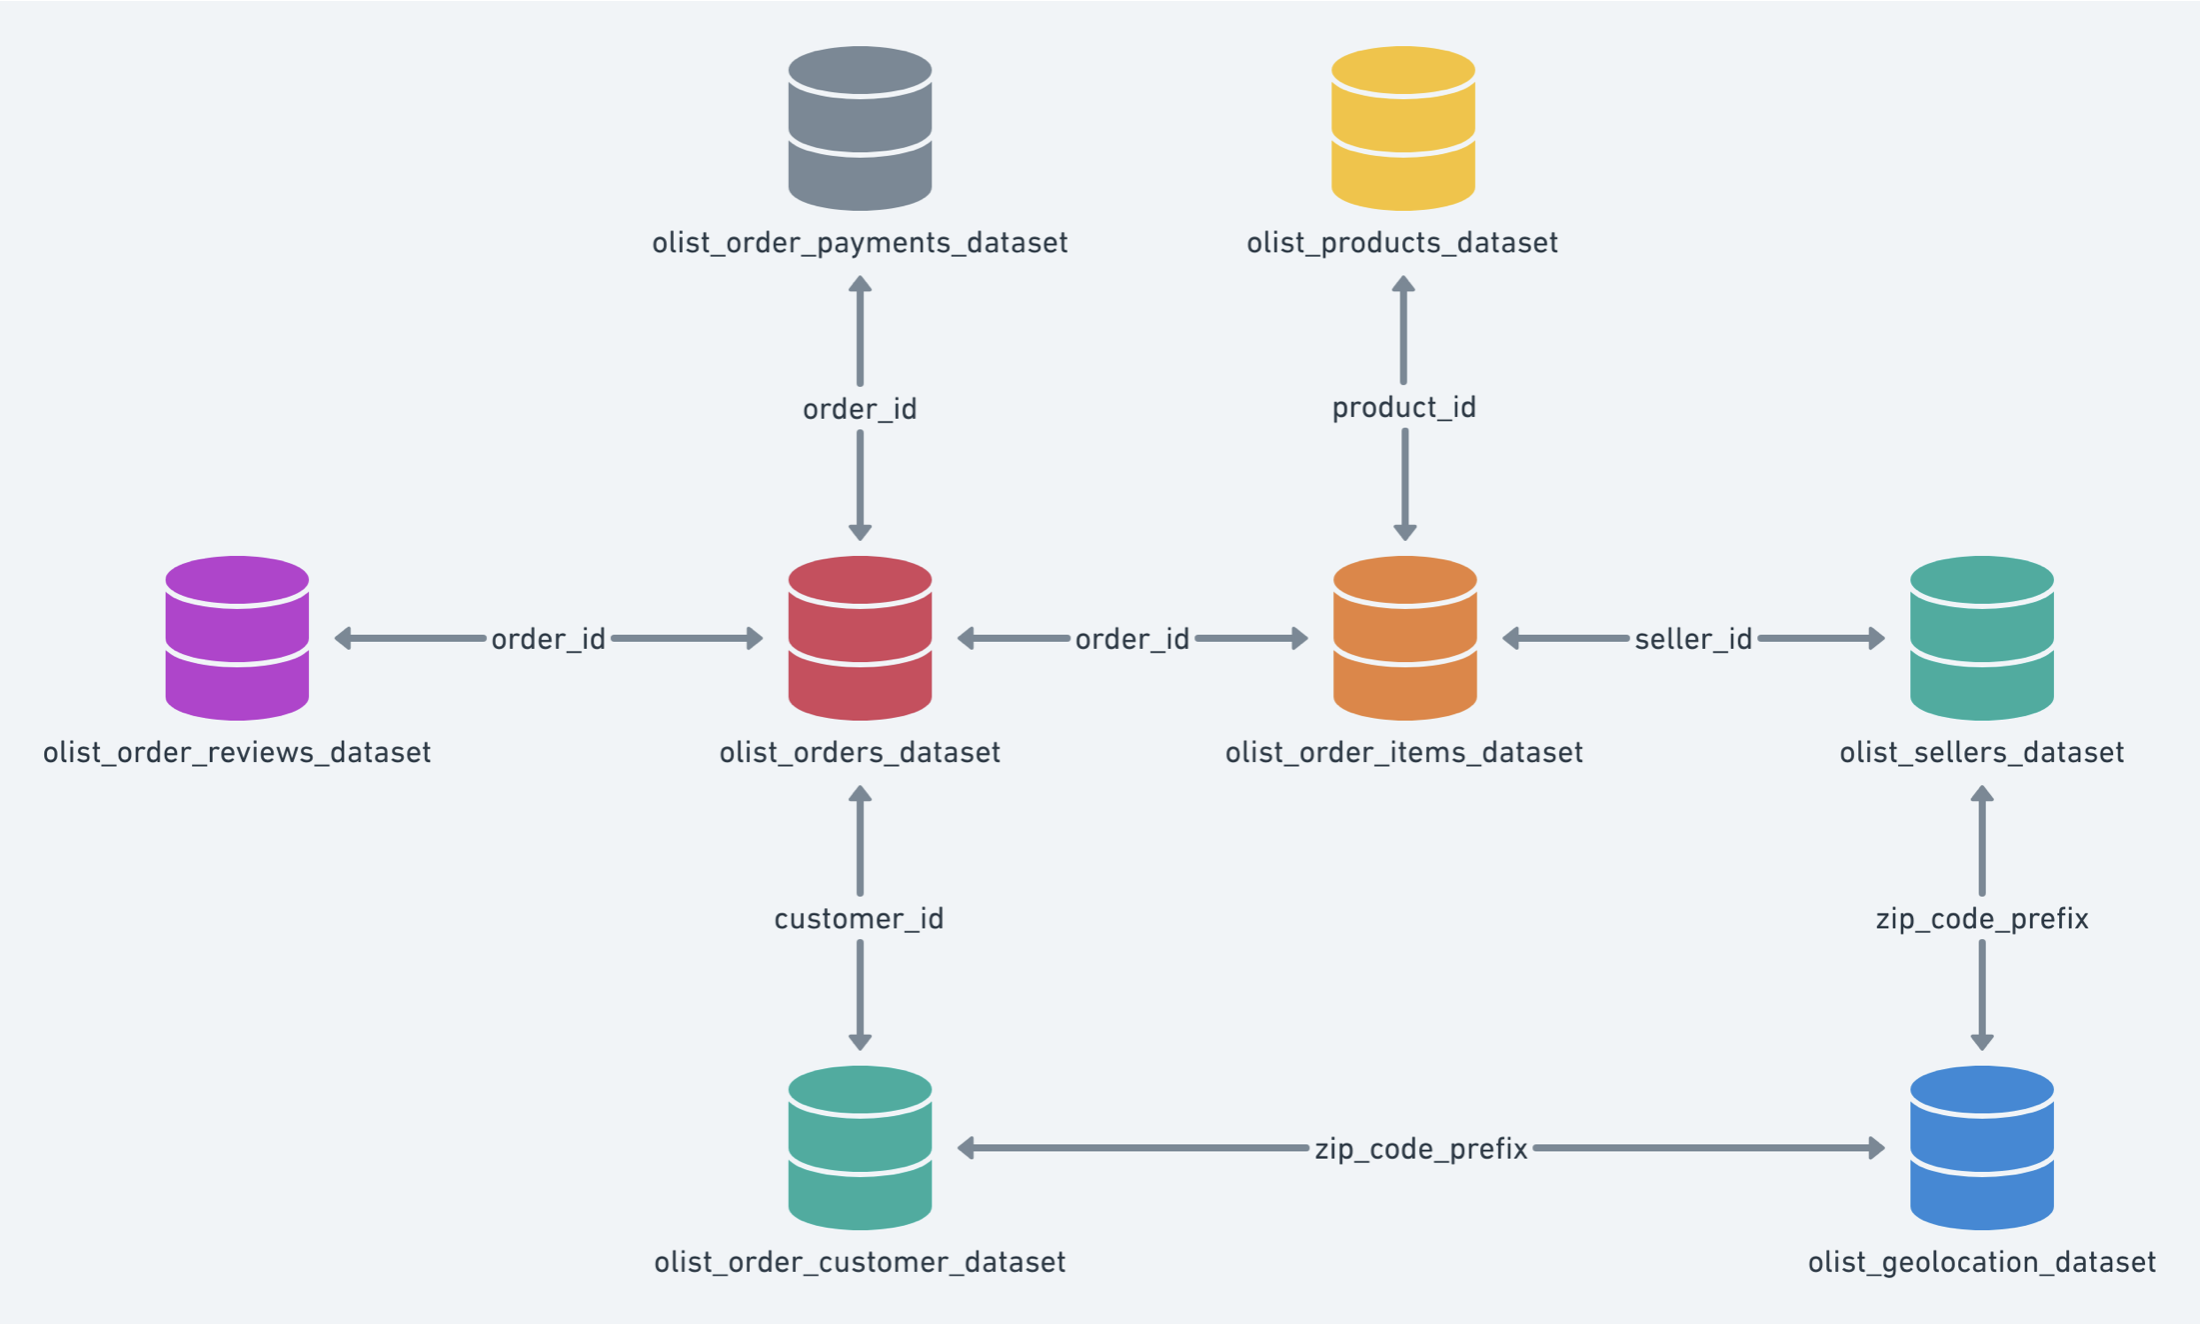

In [9]:
# Dessin représentant les liens entre nos tables
from IPython.display import Image
Image("database.png")

In [48]:
os.chdir(r'/Users/boleynkenkem/Desktop/POLIST_KENKEM_Boleyn')
customer_data=pd.read_csv('archive/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('archive/olist_geolocation_dataset.csv')
order_data=pd.read_csv('archive/olist_orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
order_items=pd.read_csv('archive/olist_order_items_dataset.csv')
payments=pd.read_csv('archive/olist_order_payments_dataset.csv')
reviews=pd.read_csv('archive/olist_order_reviews_dataset.csv')
products=pd.read_csv('archive/olist_products_dataset.csv')
seller_geo=pd.read_csv('archive/olist_sellers_dataset.csv')
product_category=pd.read_csv('archive/product_category_name_translation.csv')

orders_dataset contient des dates, parse_dates arg doit être appelé pour les convertir en objets datetime. Vérifions maintenant que les dates ont été convertis en "datetime".

In [3]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


La convertion en "datetime" a bien étè prise en compte. Ré-affichons une  fois de plus "olist_orders" pour voir.

In [4]:
order_data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


Dans la table "olist_data" ci-dessus nous voyons qu'elle est reliée à la table "olist_customers" par la présence de la clé "customer_id". Nous allons commençer par fusionner les deux tables et plutard on fusionnera la table obtenu avec d'autres tables et ainsi de suite ... 

In [5]:
customer_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [49]:
# Fusion des dataframes "customers" et "orders" via la clé "customr_id"
df=customer_data.merge(order_data, on='customer_id')

# Fusion du nouveau dataframe avec "olist_order_items" via la clé "order_id"
df=df.merge(order_items, on='order_id')

# Fusion du nouveau dataframe avec "olist_order_payments" via la clé "order_id"
df=df.merge(payments,on='order_id')  

# Fusion du nouveau dataframe avec "olist_order_reviews" via la clé "order_id"
df=df.merge(reviews, on='order_id')

# Fusion du nouveau dataframe avec "olist_products_dataset" via la clé "product_id"
df=df.merge(products, on='product_id')

# Fusion du nouveau dataframe avec "product_category_name_translation" 
df=df.merge(product_category, on='product_category_name')

# Fusion du nouveau dataframe avec "olist_sellers_dataset" via "seller_id"
df=df.merge(seller_geo, on='seller_id')

Il nous reste la table de géolocalisation à fusionner. Comme nous le montre le schéma de notre base de données plus haut, nous pouvons relier cette table soit à "olist_sellers_dataset.csv" via la clé "zip_code_prefix", soit à la table "olist_customers_dataset" via "zip_code_prefix" égalament. Mais il se trouve que nous n'avons pas la clé "zip_code_prefix" présente dans "olist_geolocation_dataset.csv". Pour arriver à fusioner les données de géolocalisation, nous allons commençer par faire un renomage de colonne. 

In [50]:
# Renommage d'une colonne de geolocalisation
geolocalisation["seller_zip_code_prefix"] = geolocalisation["geolocation_zip_code_prefix"]

# Fusion des dataframes df et "geolocalisation" via "seller_zip_code_prefix"
df=df.merge(geolocalisation, on='seller_zip_code_prefix')

# Suppression de la colonne 'geolocation_zip_code_prefix'
# df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)

In [51]:
# Renommage de certaines colonnes
df.rename(columns={"geolocation_lat": "customer_lat",
                   "geolocation_lng": "customer_lng",
                   "product_category_name_english": "product_category_name"},
          inplace=True)

In [188]:
df=df[['customer_unique_id', 'customer_zip_code_prefix', 'customer_city',                    
       'customer_state', 'order_id', 'product_id', 'seller_id', 'price',
       'order_purchase_timestamp', 'order_delivered_customer_date', 'order_item_id',
       'order_estimated_delivery_date', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_weight_g', 'product_category_name',
       'seller_zip_code_prefix', 'seller_state', 'payment_sequential']]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16849468 entries, 0 to 16849467
Data columns (total 45 columns):
customer_id                      object
customer_unique_id               object
customer_zip_code_prefix         int64
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                    int64
product_id                       object
seller_id                        object
shipping_limit_date              object
price                            float64
freight_value                    float64
payment_sequential               int64
payment_type                     object
payment_installments             int64
payment

## 3. * [Nettoyage et analyse des données ](Section_3)

## 3.1. * [Données manquantes](Section_3_1)

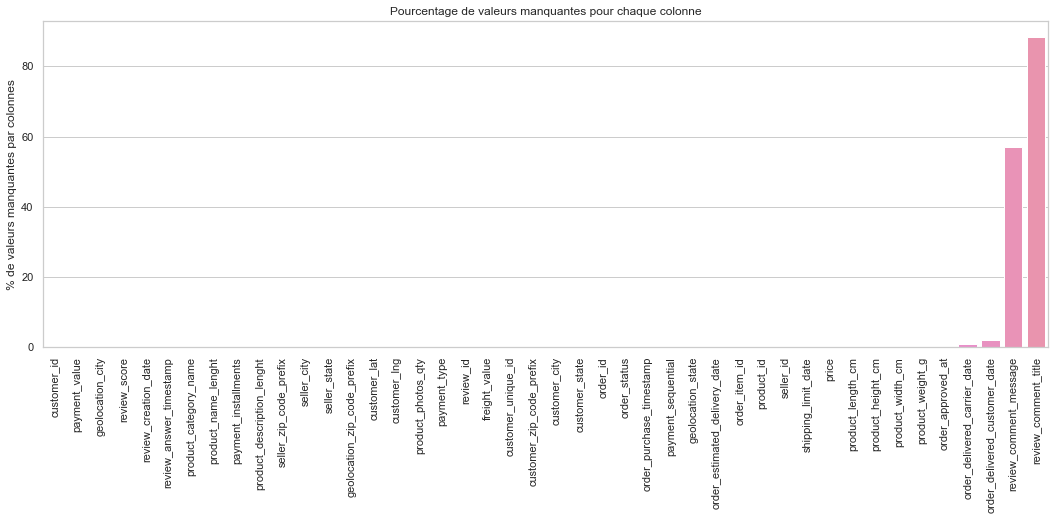

In [55]:
# Calcul des données manquantes
null_prop = df.isna().sum(axis=0).sort_values()/len(df)*100

# Affichage de la proportion de données manquants par colonne
fig = plt.figure(figsize=(18, 6))
sns.barplot(x=null_prop.index, y=null_prop.values)
plt.ylabel("% de valeurs manquantes par colonnes")
plt.title("Pourcentage de valeurs manquantes pour chaque colonne")
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.show()

In [56]:
round((df.isnull().sum()/ len(df)*100),2)

customer_id                       0.00
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state                    0.00
order_id                          0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.04
order_delivered_customer_date     2.13
order_estimated_delivery_date     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date               0.00
price                             0.00
freight_value                     0.00
payment_sequential                0.00
payment_type                      0.00
payment_installments              0.00
payment_value                     0.00
review_id                         0.00
review_score                      0.00
review_comment_title             88.45
review_comment_message   

### [Suppression des colonnes présentant plus 10% de valeurs manquantes ](Section_3)

In [57]:
# Suppression des colonnes présentant moins 90% de valaurs réelles 
cond = null_prop < 10
cond = cond[cond]
df = df.loc[:, cond.index]

### [Remplaçement des valeurs manquantes numériques par la moyenne](Section_3)

In [58]:
# Liste des colonnes numériques
num_columns = list(df.select_dtypes(include='float64').columns)
# Les valeurs manquantes pour chaque colonnes numériques
# sont remplacés par les moyennes des colonnes
df[num_columns] = SimpleImputer(strategy='mean').fit_transform(df[num_columns])

### [Remplaçement des valeurs manquantes Catégorielles](Section_3)

In [ ]:
# Liste des colonnes catégorielles
#cat_columns = list(df.select_dtypes(include='object').columns)
# Les valeurs manquantes pour les colonnes catégorielles
# sont remplacés par la valeur la plus fréquente
#df[cat_columns] = SimpleImputer(strategy='most_frequent')\
#                    .fit_transform(df[cat_columns])

## 3.2. * [Traitement des duplicates](Section_3_2)

In [59]:
def duplicates(data):
    
    """
    Affiche le nombre de duplicates dans "data", supprime
    les valeurs en doublons en conservant uniquement la première
    valeurs, renvoie un dataframe sans valeurs en double.
    """
    
    # Confirmer le nombre lignes dupliquées
    print(f"Il existe {data.duplicated().sum()} lignes dupliquées.")

    # Suppression des duplicates, on conserve juste la première 
    data = data.drop_duplicates(keep='first')

    # Confirmation de la supression des duplicates
    print(f"Après suppression, Il existe {data.duplicated().sum()} lignes dupliquées.")
    print(f"Returne le dataset avec {data.shape[0]} lignes")
    
    return data

In [60]:
olist_data = duplicates(df)

Il existe 4151624 lignes dupliquées.
Après suppression, Il existe 0 lignes dupliquées.
Returne le dataset avec 12697844 lignes


## 3.3. * [Traitement des Outliers](Section_3_2)

In [61]:
client = ['price','review_score','payment_sequential',
          'payment_value','payment_installments']

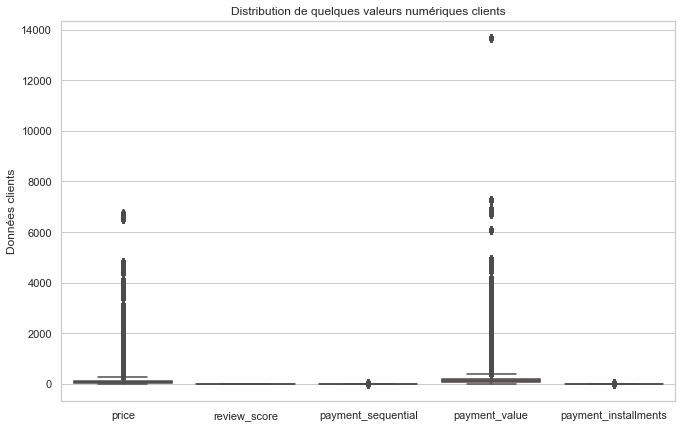

In [62]:
# Figure
plt.figure(figsize = (11,7))
x = df[client]
sns.set(style='whitegrid')
sns.boxplot(data=x)

# Add labels
plt.title("Distribution de quelques valeurs numériques clients")
plt.xlabel("")
plt.ylabel('Données clients')
plt.show()

In [63]:
# Affichage des valeurs numériques présentants des abérrations
df.describe([.75,.99])

,payment_value,review_score,product_name_lenght,payment_installments,product_description_lenght,seller_zip_code_prefix,geolocation_zip_code_prefix,customer_lat,customer_lng,product_photos_qty,freight_value,customer_zip_code_prefix,payment_sequential,order_item_id,price,product_length_cm,product_height_cm,product_width_cm,product_weight_g
count,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07,1.684947e+07
mean,1.703633e+02,4.009056e+00,4.897477e+01,2.995467e+00,7.486109e+02,2.641402e+04,2.641402e+04,-2.262514e+01,-4.736017e+01,2.055839e+00,1.993217e+01,3.456844e+04,1.091661e+00,1.197746e+00,1.182888e+02,3.029584e+01,1.656550e+01,2.355363e+01,2.037885e+03
std,2.360373e+02,1.401143e+00,1.010071e+01,2.801925e+00,6.706115e+02,2.604901e+04,2.604901e+04,2.423111e+00,2.307443e+00,1.578375e+00,1.511562e+01,2.963166e+04,7.142248e-01,6.815329e-01,1.735735e+02,1.570807e+01,1.332519e+01,1.148149e+01,3.725245e+03
min,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,4.000000e+00,1.001000e+03,1.001000e+03,-3.660537e+01,-6.788472e+01,1.000000e+00,0.000000e+00,1.003000e+03,1.000000e+00,1.000000e+00,8.500000e-01,7.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00
50%,1.080200e+02,5.000000e+00,5.200000e+01,2.000000e+00,5.360000e+02,1.494000e+04,1.494000e+04,-2.282910e+01,-4.726305e+01,1.000000e+00,1.632000e+01,2.411000e+04,1.000000e+00,1.000000e+00,7.490000e+01,2.500000e+01,1.300000e+01,2.000000e+01,7.000000e+02
75%,1.893000e+02,5.000000e+00,5.700000e+01,4.000000e+00,9.290000e+02,3.125500e+04,3.125500e+04,-2.174767e+01,-4.646720e+01,3.000000e+00,2.099000e+01,5.685000e+04,1.000000e+00,1.000000e+00,1.299900e+02,3.800000e+01,2.000000e+01,3.000000e+01,1.700000e+03
99%,1.087440e+03,5.000000e+00,6.300000e+01,1.000000e+01,3.495000e+03,9.203000e+04,9.203000e+04,-1.583816e+01,-4.262159e+01,8.000000e+00,8.396000e+01,9.754200e+04,3.000000e+00,4.000000e+00,8.100000e+02,9.000000e+01,6.500000e+01,6.000000e+01,1.860000e+04
max,1.366408e+04,5.000000e+00,7.600000e+01,2.400000e+01,3.992000e+03,9.973000e+04,9.973000e+04,-2.484892e+00,-3.484769e+01,2.000000e+01,4.096800e+02,9.998000e+04,2.900000e+01,2.100000e+01,6.735000e+03,1.050000e+02,1.050000e+02,1.180000e+02,4.042500e+04


Nous voyons que les données de payements et les données de price présentent des abérrations, nous n'allons pas les supprimer pour l'instant. Nous allons effectuer quelques analyses avant de voir s'il faut les supprimer ou pas. 

## 3.4. * [Traitement des features](Section_3_2)

In [64]:
# Dédinition des couleurs
df_blue  = '#0C29D1'
df_green = '#0CC78B'

### [customer feature](Section_3)

In [65]:
def general_customer_info(data):
    """Retour le nombre de clients uniques et réguliers dans data."""
    print("Nombre de customers uniques :", data.customer_unique_id.nunique())
    
    customer_count = data.customer_unique_id.value_counts()
    print("Nombre de customers réguliers:", customer_count[customer_count > 1].count())

    return

general_customer_info(df)

Nombre de customers uniques : 93885
Nombre de customers réguliers: 93668


Nous avons un nombre important de clients réguliers. Nous pouvons aussi regarder la distribution du nombre de commandes par client. 

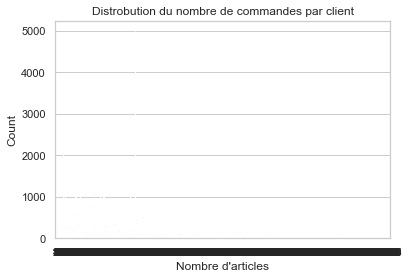

In [66]:
# Distrobution du nombre d'articles
# par client

def order_per_consumer(data):
    return data.groupby('customer_unique_id')['order_id'].agg(['count'])
    
orders_per_consumer = order_per_consumer(df)

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
sns.countplot(orders_per_consumer['count'], color=df_blue)
ax.set(xlabel="Nombre d'articles", ylabel='Count', title='Distrobution du nombre de commandes par client');


Essayons de regarder la géolocalisation des "customers" à l'intérieur du pays(Brésil).

In [67]:
# Géolocalisation des customers dans le pays

def customer_geography(data):
    customer_locations = pd.DataFrame(data.customer_city.value_counts().sort_values(ascending=False))
    
    print(f"Il existe {customer_locations.index.nunique()} villes clientes uniques.\n")
    
    top_ten_cities = customer_locations.index[:10]
    customers_in_top_ten_cities = round(customer_locations.customer_city[:10].sum()/customer_locations.customer_city.sum()*100,2)

    print(f"La majorité des 'customers', {customers_in_top_ten_cities} %, vivent dans le top 10 des villes.\n")

    return customer_locations, top_ten_cities

customer_locations, top_ten_cities = customer_geography(df)

Il existe 4090 villes clientes uniques.

La majorité des 'customers', 36.16 %, vivent dans le top 10 des villes.



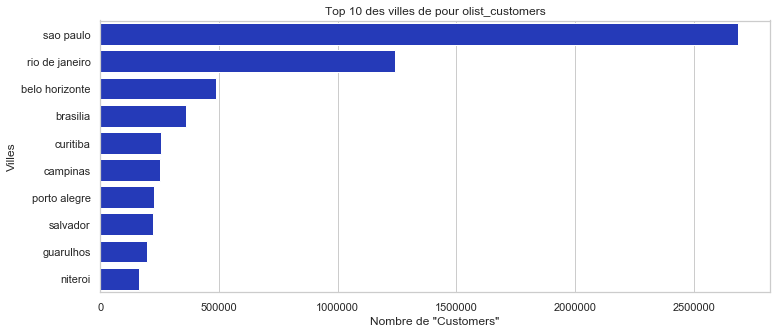

In [68]:
# plot top villes 

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
sns.barplot(x=customer_locations.customer_city[:10], y=top_ten_cities, ax=ax, color=df_blue)
ax.set(xlabel='Nombre de "Customers"', ylabel='Villes', title='Top 10 des villes de pour olist_customers');

Comme on pouvait s'y attendre, la plupart des 'customers' sont à Sao Paulo et Rio de Janerio. 

### [Order feature](Section_3)

Nous allons regarder la proportion d'article par jour.

In [69]:
# Nombre de commandes par jour

def order_per_day(data):
    order_per_day = data.groupby(data.order_purchase_timestamp.dt.date)['order_id'].agg(['count'])
    print(f" moyenne nombre de commandes par jour: {np.mean(order_per_day)[0]}")
    
    return order_per_day

order_per_day = order_per_day(df)

 moyenne nombre de commandes par jour: 27397.50894308943


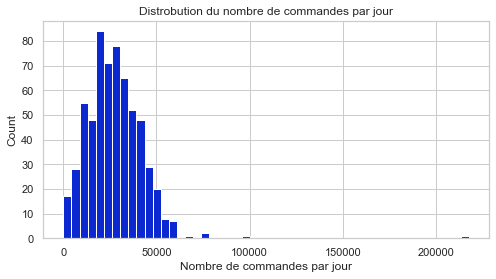

In [70]:
# Distribution d'articles par jour
plt.figure(figsize=(8,4))
plt.hist(order_per_day['count'], bins=50, color=df_blue)
plt.xlabel("Nombre de commandes par jour")
plt.ylabel('Count')
plt.title("Distrobution du nombre de commandes par jour");

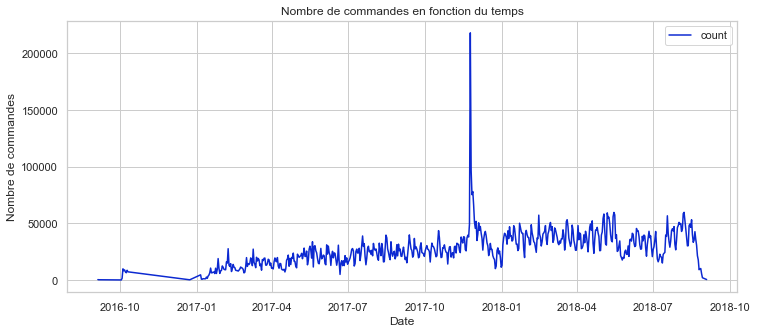

In [71]:
# plot du nombre de commandes en fonction
# du temps 
fig = plt.figure(figsize=(12,5))
ax = fig.gca()
order_per_day.plot(ax=ax, use_index=True, color=df_blue)
ax.set(xlabel='Date', ylabel='Nombre de commandes', title='Nombre de commandes en fonction du temps');

On observe un pic autour de Décembre 2017. 

In [72]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [73]:
df['year_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).year
df['month_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).month
df['date_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).day
df['time_of_purchase'] = pd.DatetimeIndex(df['order_purchase_timestamp']).hour

In [74]:
monthly_orders = pd.DataFrame(df.groupby(['month_of_purchase'])['month_of_purchase'].count())

In [75]:
monthly_orders = monthly_orders.rename(index={1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July',8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
monthly_orders

,month_of_purchase
month_of_purchase,
January,1307161
February,1388359
March,1659254
April,1557839
May,1835699
June,1593945
July,1749508
August,1826032
September,761060


In [76]:
fig = go.Figure(data=go.Scatter(x=monthly_orders.index,
                                y=monthly_orders['month_of_purchase'],
                                mode='lines+markers')) # hover text goes here
fig.update_layout(title='Months With Most Orders',xaxis_title="Month",yaxis_title="Number of Orders")
fig.update_yaxes(type="log")
fig.show()

Chaque 'item' représente un seul élément dans une commande. Nous allons regrouper les commande par ID(order_id) afon de trouver le prix d'achat total de toutes les commandes. 

Prix moyen d'achat: 159.32200989281787


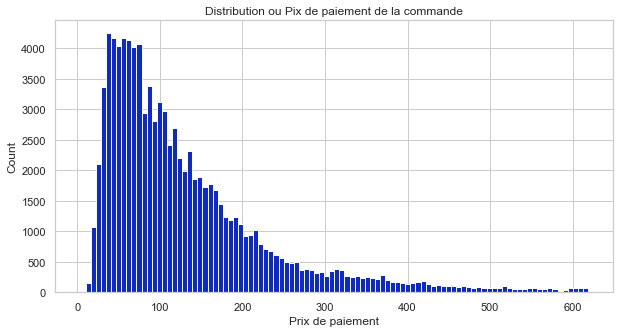

In [77]:
def purchase_payment_val(data):
    purchase_payments = data.groupby('order_id').payment_value.max()
    print(f"Prix moyen d'achat: {purchase_payments.mean()}")
    
    return purchase_payments


# Visualisation du prix d'achat en supprimant les valeurs aberrantes 
# dont les top 3% supérieurs
purchase_payments = purchase_payment_val(df)
q_97 = purchase_payments.quantile(.97)
payments_97 = purchase_payments[purchase_payments < q_97]

# plot distribution
plt.figure(figsize=(10,5))
plt.hist(payments_97, bins=100, color=df_blue)
plt.xlabel('Prix de paiement')
plt.ylabel('Count')
plt.title('Distribution ou Pix de paiement de la commande');

Affichons le nombre d'articles par commandes.

In [78]:
# Nombre d'items par commande
def items_per_order(data):
    item_orders = data.groupby('order_id').product_id.agg(['count']).sort_values(by='count')
    avg_items_per_order = item_orders.mean()
    print(f"Moyenne du nombre d'articles par commandes: {avg_items_per_order}")
    return avg_items_per_order

avg_items_per_order = items_per_order(df)

Moyenne du nombre d'articles par commandes: count    173.634254
dtype: float64


Valeur moyenne très élevée

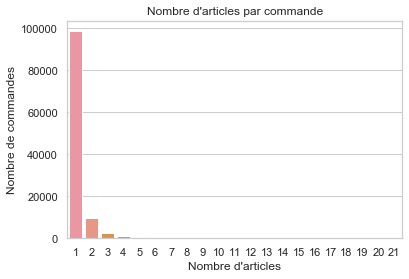

In [79]:
# Vérification du nombre moyenne d'artciles par commande
x = list(order_items["order_item_id"].value_counts().index)
y = order_items["order_item_id"].value_counts().values

plt.title("Nombre d'articles par commande")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
sns.barplot(x, y)
plt.show()

Le dernier schéma nous donne une idée sur le nombre d'article par commande. On constate que que la plupart des articles ont un artcile. 

Regardons maintenant les méthodes de payements.

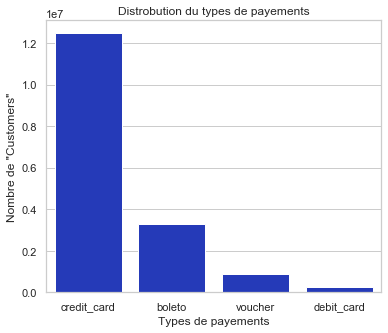

In [80]:
# Méthodes de payement
def payment_types(data):
    return data.payment_type.value_counts()

payment_types = payment_types(df)

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
sns.barplot(x=payment_types.index, y=payment_types.values, color=df_blue)
ax.set(xlabel='Types de payements', ylabel='Nombre de "Customers"', title='Distrobution du types de payements');

Le payement principal est le paiement par carte de crédit. 

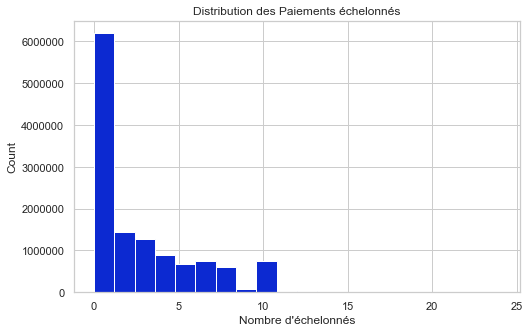

In [81]:
# Paiements échelonnés
plt.figure(figsize=(8,5))
plt.hist(olist_data.payment_installments, color=df_blue, bins=20)
plt.xlabel("Nombre d'échelonnés")
plt.ylabel('Count')
plt.title('Distribution des Paiements échelonnés');

### [Sellers feature](Section_3)

Nombre moyen de ventes par vendeur: 5568.23132848645

Le top 10 du nombre de vendeurs pour 18.33 % des ventes totales

Le top des vendeurs a 616330 ventes


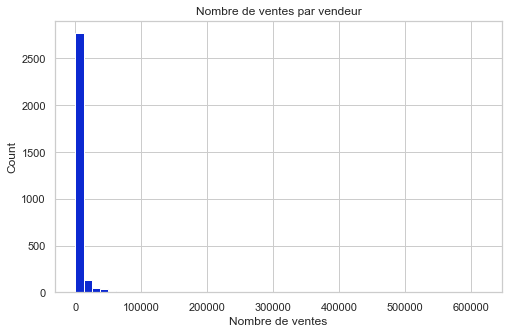

In [37]:
def sales_per_seller(data):
    """
    Renvoie le nombre moyen de ventes par vendeur, l'amplitudes
    des 10 meilleurs vendeurs, et le nombre de ventes réalisées
    par le meilleur vendeur.
    """
    
    sales_per_seller = data.groupby('seller_id')['order_id'].count()
    print(f"Nombre moyen de ventes par vendeur: {sales_per_seller.mean()}\n")
    
    top_ten_sellers = sales_per_seller.sort_values(ascending=False)[:10]
    sales_in_top_ten_sellers = round(top_ten_sellers.values.sum()/sales_per_seller.values.sum()*100,2)

    print(f"Le top 10 du nombre de vendeurs pour {sales_in_top_ten_sellers} % des ventes totales\n")

    print(f"Le top des vendeurs a {top_ten_sellers[0]} ventes")

    return sales_per_seller

sales_per_seller = sales_per_seller(df)


plt.figure(figsize=(8,5))
plt.hist(sales_per_seller, bins=50, color=df_blue)
plt.xlabel('Nombre de ventes')
plt.ylabel('Count')
plt.title('Nombre de ventes par vendeur');

### [Product feature](Section_3)

Nombre de produits uniques: 32267

Prix moyen price par produit: 118.28880630420234

Vente moyenne par produit: 522.1888616853132

Top 10 des produits vendus:
99a4788cb24856965c36a24e339b6058    151008
422879e10f46682990de24d770e7f83d    135128
389d119b48cf3043d311335e499d9c6b    107996
368c6c730842d78016ad823897a372db    105868
53759a2ecddad2bb87a079a1f1519f73    104006
0aabfb375647d9738ad0f7b4ea3653b1     55188
53b36df67ebb7c41585e8d54d6772e08     54920
35afc973633aaeb6b877ff57b2793310     54054
154e7e31ebfa092203795c972e5804a6     47200
d5991653e037ccb7af6ed7d94246b249     46080
Name: product_id, dtype: int64

Le top 10 des ventes de produits représente 5.11 % des prouits vendus.



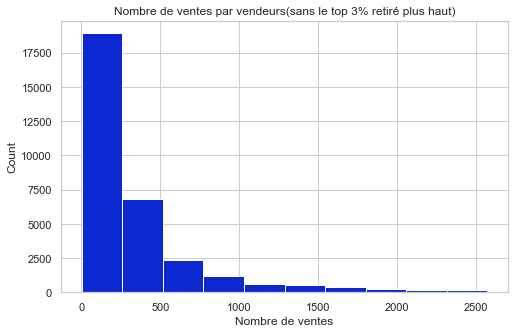

In [38]:
# Coût moyen des produits
def product_sales_info(data, df_blue):
    """
    Identifie le nombre de produits uniques vendus chez olist, le prix moyen par produit, le
    nombre moyen de ventes par produit, affiche une liste des dix meilleurs produits. Trace la
    distribution des ventes par produit.
    """
    
    print(f"Nombre de produits uniques: {data.product_id.nunique()}\n")
    print(f"Prix moyen price par produit: {data.price.mean()}\n")
    
    number_prod_sold = data.product_id.value_counts()
    print(f"Vente moyenne par produit: {np.mean(number_prod_sold)}\n")
    
    # top produits
    top_ten_products = number_prod_sold[:10]
    print(f"Top 10 des produits vendus:\n{top_ten_products}\n")
    print(f"Le top 10 des ventes de produits représente {round(top_ten_products.values.sum()/number_prod_sold.values.sum()*100,2)} % des prouits vendus.\n")

    p_q_97 = number_prod_sold.quantile(.97)
    products_q_97 = number_prod_sold[number_prod_sold < p_q_97]

    plt.figure(figsize=(8,5))
    plt.hist(products_q_97, bins=10, color=df_blue)
    plt.xlabel('Nombre de ventes')
    plt.ylabel('Count')
    plt.title('Nombre de ventes par vendeurs(sans le top 3% retiré plus haut)');
    
    return

product_sales_info(df, df_blue)


Regardons un peu les produits les mieux notés selon la note et les avis.

Le top des produits évalués sont
                              product_id  mean  count
624    0554911df28fda9fd668ce5ba5949695   5.0   5282
31338  f89ebafd68e36c290966602cfaabb585   5.0   4858
17572  8b6ed41158b194711f83b8da92757544   5.0   4234
1622   0cc18feec97e534a363ec0b14c632692   5.0   4068
8458   4254fb9a475231dc0442038cd846a387   5.0   3516
29185  e7a6f33d382bca6fa19f52ff13e440bd   5.0   3432
17064  870bcc6c58e03ca658cfdd13db4bbe28   5.0   3152
14034  6ee7217ab647f3c2b4a5161c75cadab3   5.0   3146
15670  7b52ce3d6635ac7eb9d2bbb3dc931843   5.0   3010
2420   12d4987d54a76e89154609f0314b0f2f   5.0   2872


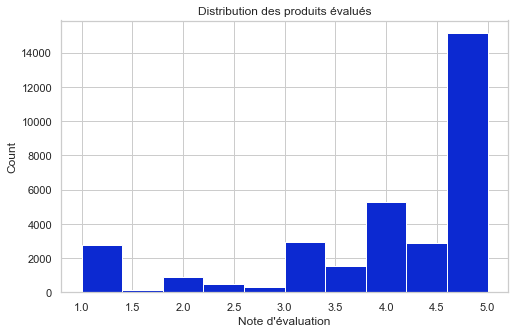

In [39]:
def product_reviews(data):
    reviewed_products = data.groupby('product_id')['review_score'].agg(['mean', 'count']).reset_index()
    top_ten_reviewed_products = reviewed_products.sort_values(by=['mean','count'],ascending=False)[:10]

    print(f"Le top des produits évalués sont\n {top_ten_reviewed_products}")
    
    return reviewed_products

reviewed_products = product_reviews(df)


plt.figure(figsize=(8,5))
plt.hist(reviewed_products['mean'], bins=10, color=df_blue)
plt.xlabel("Note d'évaluation")
plt.ylabel('Count')
plt.title("Distribution des produits évalués");

La plupart des produits sont très bien notés. Essayons de jeter un coup d'oeil sur la relation entre la note d'évaluation et les avis. 

<Figure size 432x360 with 0 Axes>

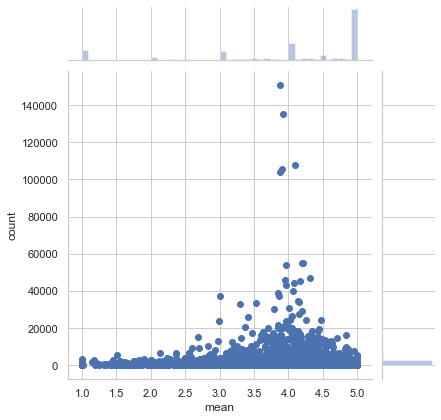

In [40]:
fig = plt.figure(figsize=(6,5))
ax = sns.jointplot(x=reviewed_products['mean'], y=reviewed_products['count'], data=reviewed_products);

Regardons aussi les produits par catégories.

Il existe 71 catégories


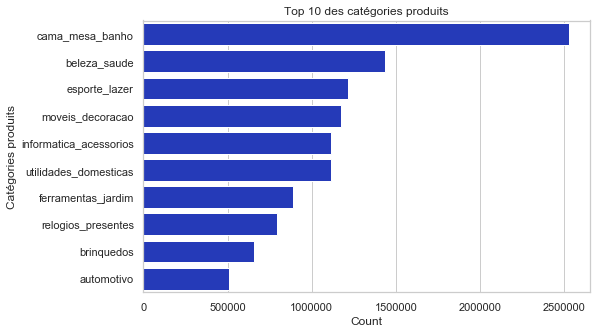

In [41]:
def product_categories(df):
    
    df = df.loc[:,~df.columns.duplicated()]
    df['product_category_name'].value_counts()
    
    print(f"Il existe {df.product_category_name.nunique()} catégories")
    
    top_ten_categories = df.product_category_name.value_counts().sort_values(ascending=False)[:10]

    plt.figure(figsize=(8,5))
    ax = sns.barplot(top_ten_categories.values, top_ten_categories.index, color=df_blue)
    ax.set(xlabel='Count', ylabel='Catégories produits', title='Top 10 des catégories produits');
    
    return

product_categories(df)

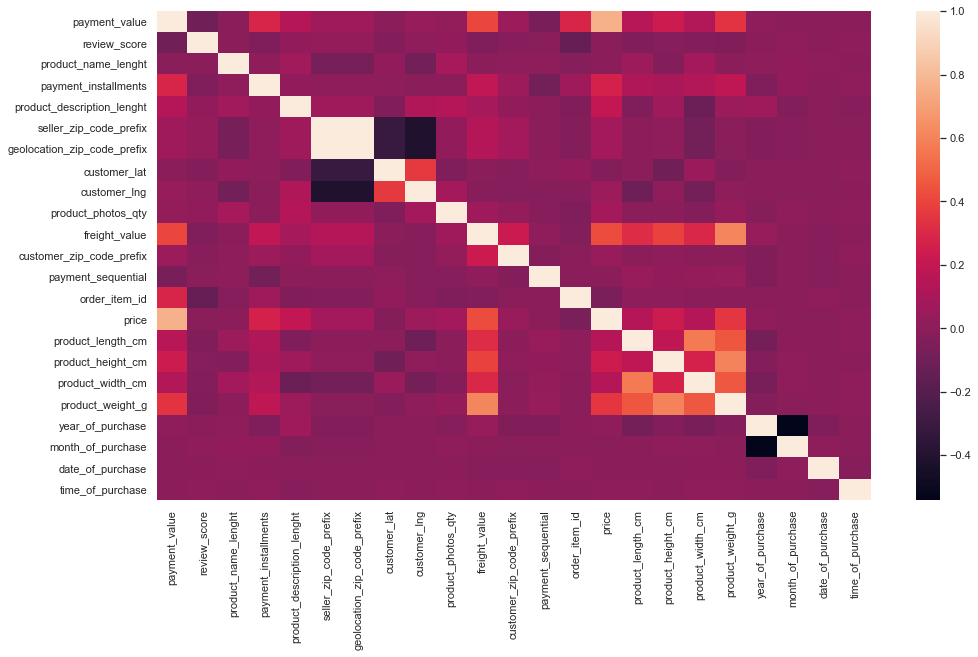

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr())

### [Feature Engineering](Section_3)

Continuons notre analyse sur les feature engineering. Quand ils visitent le site Olist, les clients sont signalés soit comme client régulier ou nouveau client et traités tel. 

- Clients réguliers: le filtrage collaboratif est utilisé pour recommander des produits. La qualités des résultats est mesurée en fonction du nombre de prédictions correctes obtenues en utilisant le recommandeur contre le  nombre de prédictions correctes lorsque l'on recommande simplement l'élément le plus populaire.

- Pour les nouveaux utilisateurs: la recommandation se fait  comme suit:
       - Segmentation des clients, puis choisissez le meilleur produit de cette clientè
       - Les gens de votre région, puis choisissez les meilleurs produits de cette clientèle

la qualités des résultats sont mesurés en comparant les prédictions à l'élément global le plus populaire.

In [176]:
def repeat_and_first_time(data):
    """Retourne un dataset avec seulement les clients réguliers """
    repeaters = data.groupby('customer_unique_id').filter(lambda x: len(x) > 1)
    first_timers = data.groupby('customer_unique_id').filter(lambda x: len(x) == 1)
    
    # Savegarde du datasets pour y accéder facilement
    repeaters.to_csv('data/repeater_data.csv')
    first_timers.to_csv('data/first_timer_data.csv')
    
    print("Dimension du dataset régulier:", repeaters.shape)

    print("Dimension du dataset temporel:", first_timers.shape)

    return repeaters, first_timers

In [177]:
repeater_data, first_timer_data = repeat_and_first_time(df)

Dimension du dataset régulier: (16849251, 28)
Dimension du dataset temporel: (217, 28)


In [178]:
def regenerate_dataset_with_indicators(repeater_data, first_timer_data):
    repeater_data['repeater'] = 1
    first_timer_data['repeater'] = 0
    
    full_df = pd.concat((repeater_data, first_timer_data), axis=0).reset_index()
    print("Dimension totale:", full_df.shape)
    return full_df

full_df = regenerate_dataset_with_indicators(repeater_data, first_timer_data)

/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/boleynkenkem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Dimension totale: (16849468, 30)


In [43]:
full_df = df

Nous ajoutons des features supplémentaires au dataset pour explorer le processus de livraison et les performances du vendeur.

In [44]:
def full_def_feature_engineering(data):
    data.order_purchase_timestamp = pd.to_datetime(data.order_purchase_timestamp).dt.date
    data.order_delivered_customer_date = pd.to_datetime(data.order_delivered_customer_date).dt.date
    data.order_estimated_delivery_date = pd.to_datetime(data.order_estimated_delivery_date).dt.date
    
    df = data.copy()
    
    df['days_to_delivery'] = (df.order_delivered_customer_date - data.order_purchase_timestamp).apply(lambda x: x.days) 
    print("Étape 1 complete.")
    
    df['estimated_days_to_delivery'] = (df.order_estimated_delivery_date - data.order_purchase_timestamp).apply(lambda x: x.days)
    
    df['days_early_late'] = (df.estimated_days_to_delivery - df.days_to_delivery)#negative = late
    print("Étape 2 complete.")    
    
    df['seller_avg_rating'] = df.groupby('seller_id')['review_score'].transform('mean')
    print("Étape 3 complete.")
    
    df = df.dropna(axis=0)
    
    return df

feat_eng_full = full_def_feature_engineering(full_df)

#export pour visuel
feat_eng_full.to_csv('data/feat_engine_full_df.csv')

Étape 1 complete.
Étape 2 complete.
Étape 3 complete.


### [Clients réguliers](Section_3)

Le full_data set est filtré uniquement pour les clients réguliers. L'objectif est de prédire les avis des clients sur un produit qu'ils n'ont pas acheté. Cinq méthodes sont testées et comparées: en utilisant uniquement le nombre d'achats, en utilisant des variables fictives, une fréquence d'achat normalisée, une matrice d'évaluation des utilisateurs et une matrice d'évaluation normalisée des utilisateurs.

In [45]:
feat_eng_full

,customer_id,payment_value,geolocation_city,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name,product_name_lenght,payment_installments,product_description_lenght,product_category_name,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,customer_lat,customer_lng,product_photos_qty,payment_type,review_id,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,geolocation_state,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_length_cm,product_height_cm,product_width_cm,product_weight_g,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,year_of_purchase,month_of_purchase,date_of_purchase,time_of_purchase,days_to_delivery,estimated_days_to_delivery,days_early_late,seller_avg_rating
0,06b8999e2fba1a1fbc88172c00ba8bc7,146.87,itaquaquecetuba,4,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,office_furniture,41.0,2,1141.0,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8577,-23.482623,-46.374490,1.0,credit_card,88b8b52d46df026a9d1ad2136a59b30b,21.88,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,1,SP,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,54.0,64.0,31.0,8683.0,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017,5,16,15,9.0,20,11.0,3.390294
1,06b8999e2fba1a1fbc88172c00ba8bc7,146.87,itaquaquecetuba,4,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,office_furniture,41.0,2,1141.0,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8577,-23.489888,-46.372657,1.0,credit_card,88b8b52d46df026a9d1ad2136a59b30b,21.88,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,1,SP,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,54.0,64.0,31.0,8683.0,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017,5,16,15,9.0,20,11.0,3.390294
2,06b8999e2fba1a1fbc88172c00ba8bc7,146.87,itaquaquecetuba,4,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,office_furniture,41.0,2,1141.0,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8577,-23.483042,-46.374934,1.0,credit_card,88b8b52d46df026a9d1ad2136a59b30b,21.88,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,1,SP,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,54.0,64.0,31.0,8683.0,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017,5,16,15,9.0,20,11.0,3.390294
3,06b8999e2fba1a1fbc88172c00ba8bc7,146.87,itaquaquecetuba,4,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,office_furniture,41.0,2,1141.0,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8577,-23.479473,-46.360819,1.0,credit_card,88b8b52d46df026a9d1ad2136a59b30b,21.88,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,1,SP,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,54.0,64.0,31.0,8683.0,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017,5,16,15,9.0,20,11.0,3.390294
4,06b8999e2fba1a1fbc88172c00ba8bc7,146.87,itaquaquecetuba,4,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,office_furniture,41.0,2,1141.0,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP,8577,-23.489348,-46.361394,1.0,credit_card,88b8b52d46df026a9d1ad2136a59b30b,21.88,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,1,SP,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,54.0,64.0,31.0,8683.0,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25,2017,5,16,15,9.0,20,1